# Face recognition

使用opencv內建之haar cascade以及lbp cascade進行人臉辨識

In [1]:
import numpy as np
import cv2 as cv

###  建構CascadeClassifier，從硬碟中讀取模型

In [2]:
#cascade=cv.CascadeClassifier(model_location)
#cascade:建構出來的分類器
#model_location:模型的存放位置
face_cascade = cv.CascadeClassifier('./assets/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('./assets/haarcascades/haarcascade_eye.xml')



# 1個人的情況
---

## __1.__ 將圖片讀入，並轉換為灰階

In [12]:
one_person_img = cv.imread('./img/Lenna.png')
one_person_gray = cv.cvtColor(one_person_img, cv.COLOR_BGR2GRAY)

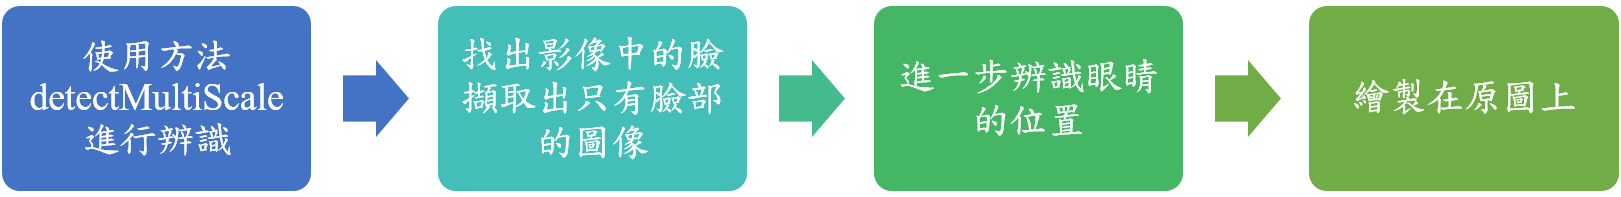

## __2.__使用detectMultiScale方法進行辨識 
利用`cv.detectMultiScale`會回傳辨識結果

In [13]:
faces=[]

#detect=cascade.detectMultiScale(src_img,scale_factor,minNeighbors)
#detect:辨識結果 ([[x1,y1,w1,h1],[x2,y2,w2,h2],......])
#src_img:要辨識的影像
#scale_factor:表示在前後兩次相繼的掃描中，搜索窗口的比例係數。默認為1.1即每次搜索窗口依次擴大10%
#minNeighbors:表示構成檢測目標的相鄰矩形的最小個數(默認為3個)。檢測目標成功所需要的周圍矩形框的數目，
#每一個特徵匹配到的區域都是一個矩形框，只有多個矩形框同時存在的時候，才認為是檢測目標成功
faces = face_cascade.detectMultiScale(one_person_gray, 1.1, 4)

for (x,y,w,h) in faces:
    cv.rectangle(one_person_img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = one_person_gray[y:y+h, x:x+w]
    roi_color = one_person_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        


## __3.__ 最後將圖show出來

In [5]:
cv.imshow('img',one_person_img)
cv.waitKey(0)
cv.destroyAllWindows()

# 3個人的情況
---

## __1.__ 將圖片讀入，並轉換為灰階

In [6]:
three_people_img = cv.imread('./img/three_people.jpg')
three_people_gray = cv.cvtColor(three_people_img, cv.COLOR_BGR2GRAY)

## __2.__使用detectMultiScale方法進行辨識 

In [7]:
faces=[]

faces = face_cascade.detectMultiScale(three_people_gray, 1.2, 4)

for (x,y,w,h) in faces:
    cv.rectangle(three_people_img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = three_people_gray[y:y+h, x:x+w]
    roi_color = three_people_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray,1.2, 4)
    for (ex,ey,ew,eh) in eyes:
        cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

## __3.__ 最後將圖show出來

In [8]:
cv.imshow('img',three_people_img)
cv.waitKey(0)
cv.destroyAllWindows()

# 多人的情況
---

## __1.__ 將圖片讀入，並轉換為灰階

In [9]:
many_people_img = cv.imread('./img/many_people.jpeg')
many_people_gray = cv.cvtColor(many_people_img, cv.COLOR_BGR2GRAY)

## __2.__使用detectMultiScale方法進行辨識 

In [10]:
faces=[]

faces = face_cascade.detectMultiScale(many_people_gray, 1.2, 4)

for (x,y,w,h) in faces:
    cv.rectangle(many_people_img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = many_people_gray[y:y+h, x:x+w]
    roi_color = many_people_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray,1.2, 4)
    for (ex,ey,ew,eh) in eyes:
        cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

## __3.__ 最後將圖show出來

In [11]:
cv.imshow('img',many_people_img)
cv.waitKey(0)
cv.destroyAllWindows()